In [2]:
import os
from scipy.io.wavfile import read
import scipy.io.wavfile as wav
import subprocess as sp
import numpy as np
import argparse
import random
import os
import sys
from random import shuffle
import speechpy
import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
import numpy as np
import pylab as pyl

In [2]:
dr="D:/As Freelancer/Projects/Speaker Recognition/wave/TRAIN/"
drlist=os.listdir(dr)
music=[]
ext=[".wav",".mp3"]
for i in drlist:
    if i[-4:] in ext:
        music.append(i)

In [3]:
print(music)

['Arijit Singh-1.wav', 'Arijit Singh-10.wav', 'Arijit Singh-11.wav', 'Arijit Singh-12.wav', 'Arijit Singh-13.wav', 'Arijit Singh-14.wav', 'Arijit Singh-15.wav', 'Arijit Singh-16.wav', 'Arijit Singh-17.wav', 'Arijit Singh-18.wav', 'Arijit Singh-2.wav', 'Arijit Singh-3.wav', 'Arijit Singh-4.wav', 'Arijit Singh-5.wav', 'Arijit Singh-6.wav', 'Arijit Singh-7.wav', 'Arijit Singh-8.wav', 'Arijit Singh-9.wav', 'Gulam Ali-1.wav', 'Gulam Ali-10.wav', 'Gulam Ali-11.wav', 'Gulam Ali-12.wav', 'Gulam Ali-13.wav', 'Gulam Ali-14.wav', 'Gulam Ali-15.wav', 'Gulam Ali-16.wav', 'Gulam Ali-17.wav', 'Gulam Ali-18.wav', 'Gulam Ali-2.wav', 'Gulam Ali-3.wav', 'Gulam Ali-4.wav', 'Gulam Ali-5.wav', 'Gulam Ali-6.wav', 'Gulam Ali-7.wav', 'Gulam Ali-8.wav', 'Gulam Ali-9.wav', 'Kumar Sanu-1.wav', 'Kumar Sanu-10.wav', 'Kumar Sanu-11.wav', 'Kumar Sanu-12.wav', 'Kumar Sanu-13.wav', 'Kumar Sanu-14.wav', 'Kumar Sanu-15.wav', 'Kumar Sanu-16.wav', 'Kumar Sanu-17.wav', 'Kumar Sanu-18.wav', 'Kumar Sanu-2.wav', 'Kumar Sanu-3.

In [4]:
print(dr+music[0])

D:/As Freelancer/Projects/Speaker Recognition/wave/TRAIN/Arijit Singh-1.wav


In [5]:
samplerate0, data0 = wav.read(dr+music[0])

In [6]:
samplerate0

44100

In [7]:
data0.ndim

2

In [8]:
len(data0)

462848

In [9]:
data0.size

925696

In [10]:
samples0 = data0.shape[0]
samples0

462848

In [11]:
a=[]
b=[]
for i in range(len(data0)):
    a.append(data0[i][0])
    b.append(data0[i][1])

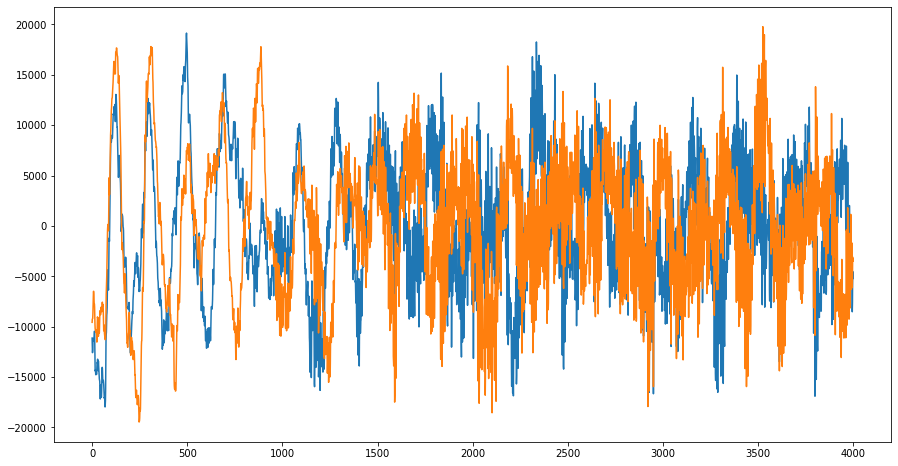

In [248]:
plt.figure(figsize=(15,8))
plt.plot(data0[4000:8000])

In [249]:
freqs = fftfreq(samples0,1/samplerate0)
datafft = fft(data0)
fftabs = abs(datafft)

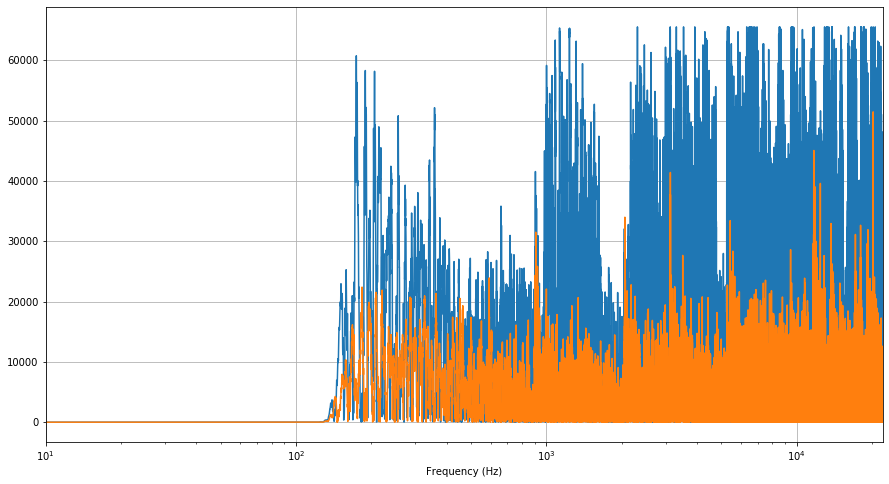

In [250]:
plt.figure(figsize=(15,8))
plt.xlim( [10, samplerate0/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.savefig(dr+music[0][:-4]+".png")

### Sound Analysis

In [3]:
from __future__ import print_function
import librosa, librosa.display
import numpy as np
import datetime
from scipy.io.wavfile import read
import scipy.io.wavfile as wav
import scipy, sklearn
import numpy
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display



In [62]:
x, sr = librosa.load(dr+music[1])
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames)
print(len(onset_frames))

[  3  22  33  55  77  88  99 121 126 143 154 164 176 182 208 230 252 263
 274 296 318 340 351 362 372 383]
26


#### Converting Frame to Seconds

In [63]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
print(len(onset_times))

[0.06965986 0.510839   0.7662585  1.27709751 1.78793651 2.04335601
 2.29877551 2.80961451 2.92571429 3.32045351 3.57587302 3.80807256
 4.08671202 4.22603175 4.82975057 5.34058957 5.85142857 6.10684807
 6.36226757 6.87310658 7.38394558 7.89478458 8.15020408 8.40562358
 8.63782313 8.89324263]
26


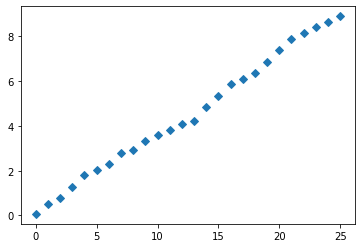

In [64]:
plt.plot(onset_times,"D")

In [65]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

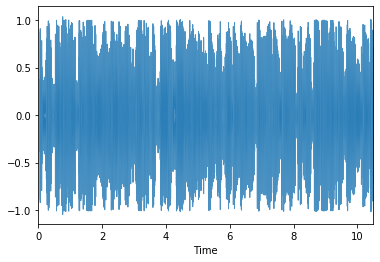

In [66]:
librosa.display.waveplot(x, sr, alpha=0.8)

4096
[300.99847211 268.46195521 215.13126573 171.15638266 161.51496629
 161.51496629 124.14555157 109.51001788 103.97492051 103.97492051
 101.84948403  95.58902962  84.62933262  74.47264014  74.47264014
  71.72646637  65.02021141  62.70442749  62.70442749  61.92123649
  61.92123649  60.23652122  59.90733223  59.90733223  58.6059606
  52.27654938  52.27654938  52.22024693  52.22024693  51.69624103
  47.22432721  47.22432721  46.63916465  46.63916465  44.8459227
  44.8459227   43.6336528   43.6336528   43.04931186  41.73947573
  41.58721809  38.66059455  38.66059455  38.65088576  38.65088576
  37.98779177  37.08213824  37.08213824  36.79149721  34.08139229]
[247.7, 253.1, 242.3, 258.5, 48.5, 22006.9, 236.9, 263.8, 21829.2, 226.2, 495.4, 231.5, 43.1, 21834.6, 220.8, 53.8, 75.4, 21554.6, 500.8, 21845.4, 210.0, 59.2, 21549.2, 506.2, 280.0, 285.4, 21770.0, 166.9, 21888.5, 193.8, 21985.4, 70.0, 37.7, 22017.7, 274.6, 21780.8, 290.8, 21764.6, 269.2, 80.8, 64.6, 21726.9, 328.5, 107.7, 21947.7, 1

Text(0.5, 0, 'Frequency (Hz)')

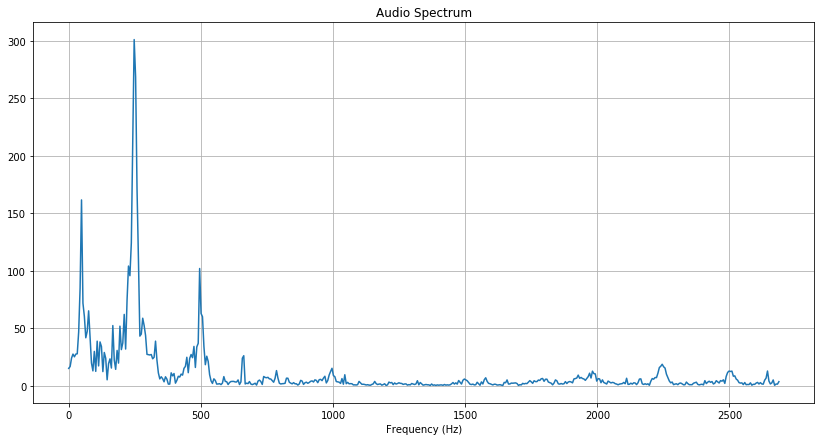

In [104]:
X = scipy.fft(x[:4096])
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 4096)  # frequency variable
print(len(X_mag))
X_mag1=X_mag.copy()
X_mag1.sort()
temp=np.unique(X_mag1[::-1][:70])
temp=temp[::-1]
print(temp)
#print("%0.1f"%f[X_mag.tolist().index(temp[0])])
#print(X_mag[temp[0]])
freq_data=[]
for itr in range(len(temp)):
    freq_data.append(float("%0.1f"%f[X_mag.tolist().index(temp[itr])]))
print(freq_data)

plt.figure(figsize=(14, 7))
plt.title("Audio Spectrum")
plt.grid()
#plt.xlim(0,400,10)
#plt.xlim(0,sr/2,200)
plt.plot(f[:500], X_mag[:500]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Text(0.5, 0, 'Frequency (Hz)')

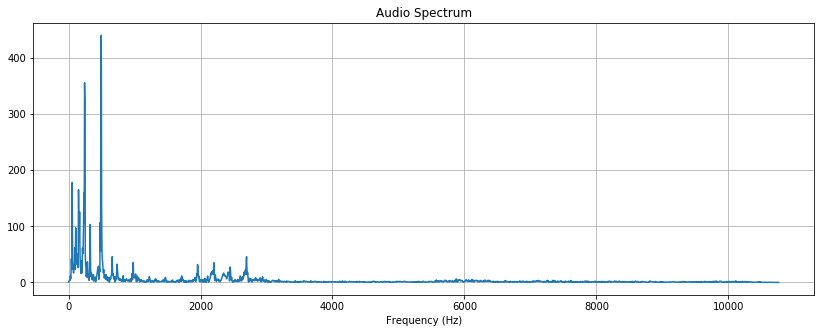

In [156]:
X = scipy.fft(x[10000:14096])
X_mag = numpy.absolute(X)
plt.figure(figsize=(14, 5))
plt.title("Audio Spectrum")
plt.grid()
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

In [299]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
float(hop_length)/sr
float(n_fft)/sr

0.09287981859410431

In [300]:
X.shape

(1025, 453)

In [301]:
S = librosa.amplitude_to_db(abs(X))

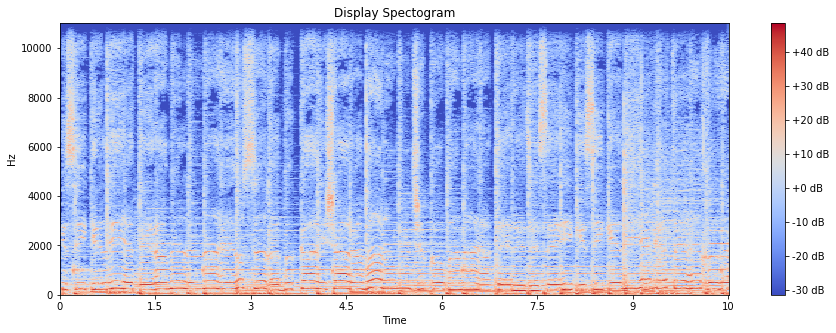

In [303]:
plt.figure(figsize=(15, 5))
plt.title("Display Spectogram")
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

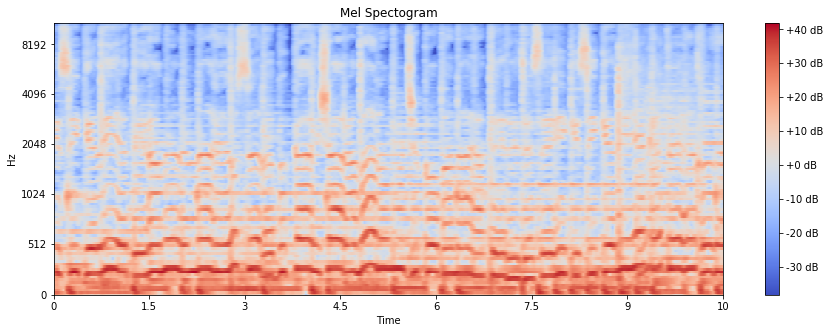

In [304]:
hop_length = 256
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=hop_length)
logS = librosa.power_to_db(abs(S))
plt.figure(figsize=(15, 5))
plt.title("Mel Spectogram")
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

#### Spectral Features

In [310]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(453,)

In [311]:
#Compute the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

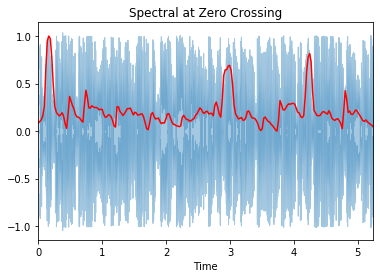

In [316]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.title("Spectral at Zero Crossing")
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

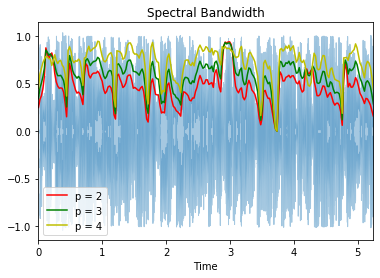

In [320]:
#Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.title("Spectral Bandwidth")
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

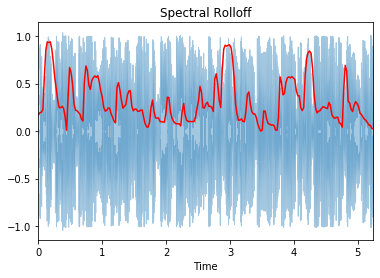

In [322]:
# Spectral RollOff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.title("Spectral Rolloff")
plt.plot(t, normalize(spectral_rolloff), color='r')

### Peak Detection

In [324]:
hop_length = 256
onset_envelope = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)
N = len(x)
T = N/float(sr)
t = numpy.linspace(0, T, len(onset_envelope))

(0, 12.133412218093872)

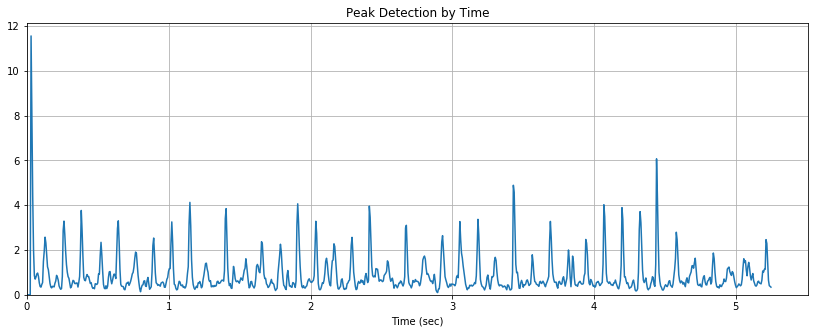

In [326]:
plt.figure(figsize=(14, 5))
plt.title("Peak Detection by Time")
plt.grid()
plt.plot(t, onset_envelope)
plt.xlabel('Time (sec)')
plt.xlim(xmin=0)
plt.ylim(0)

c:\users\comp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\users\comp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


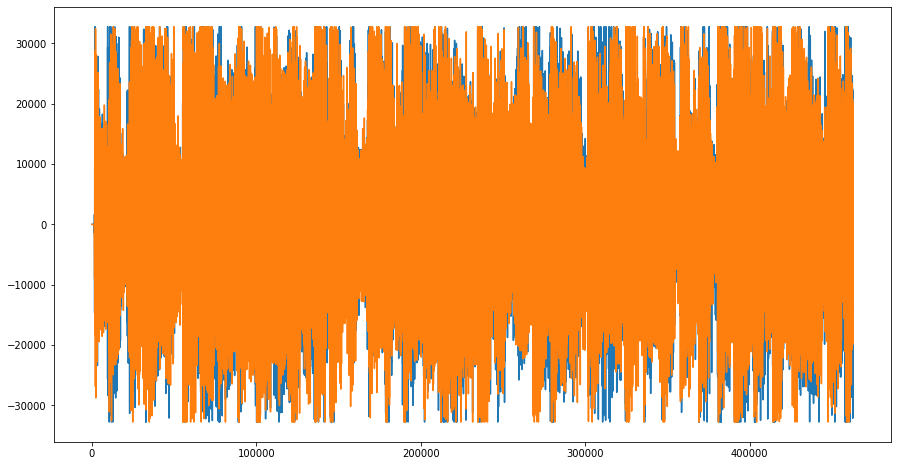

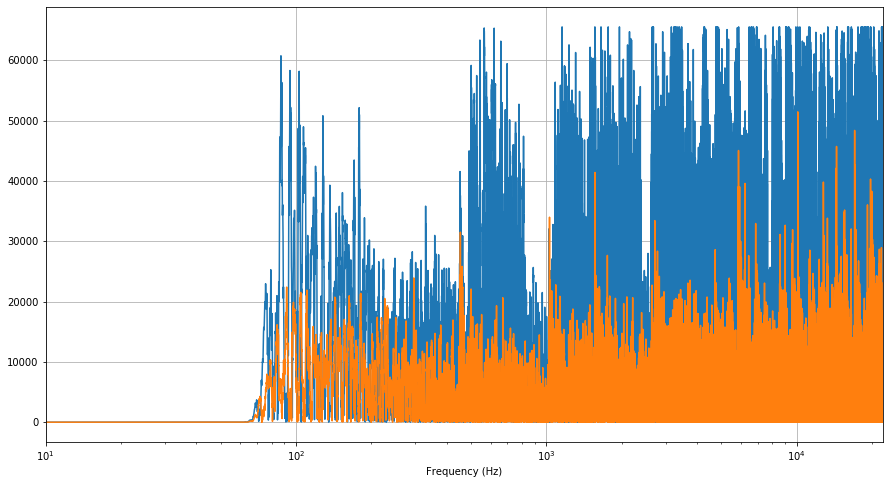

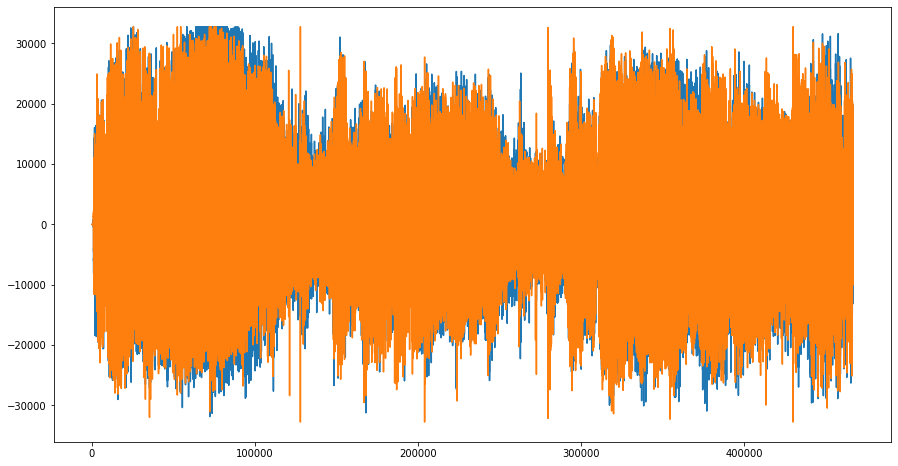

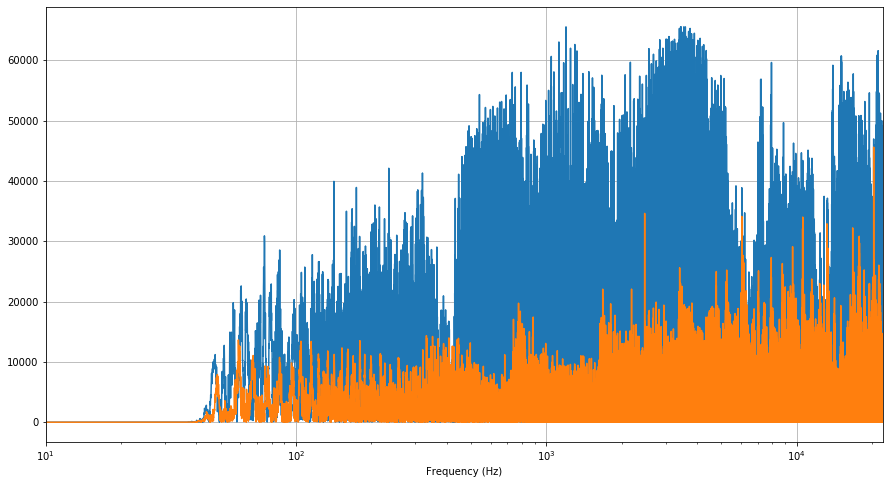

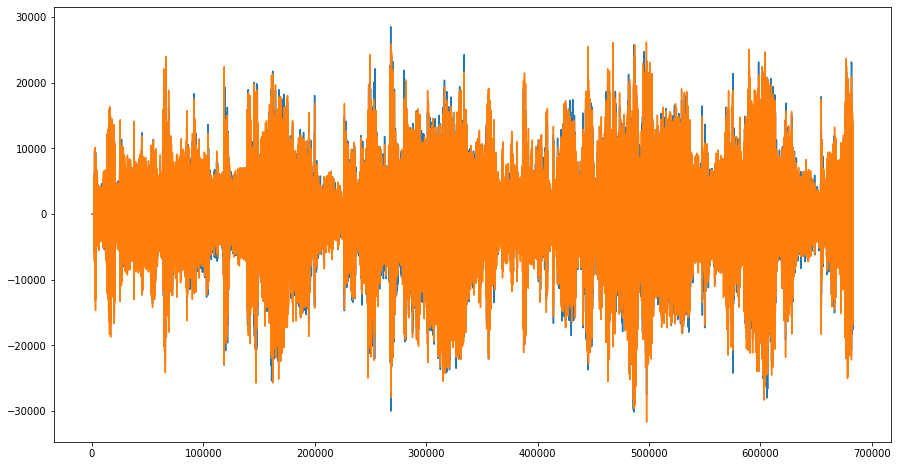

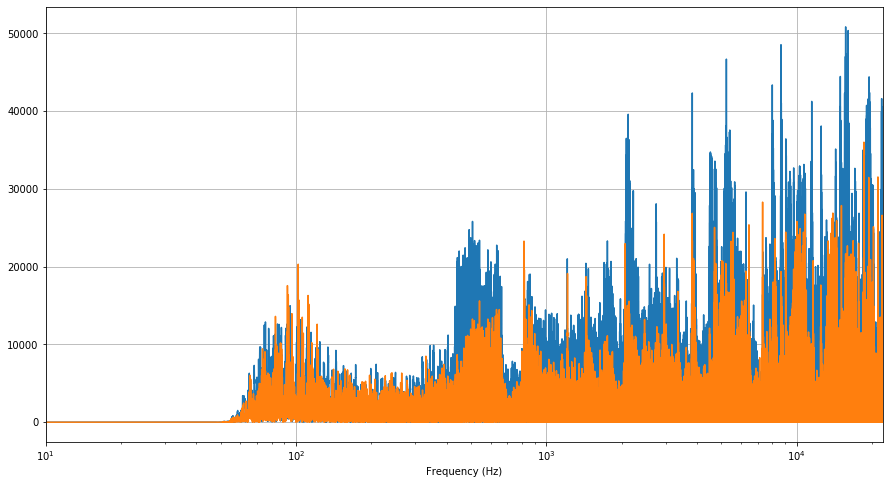

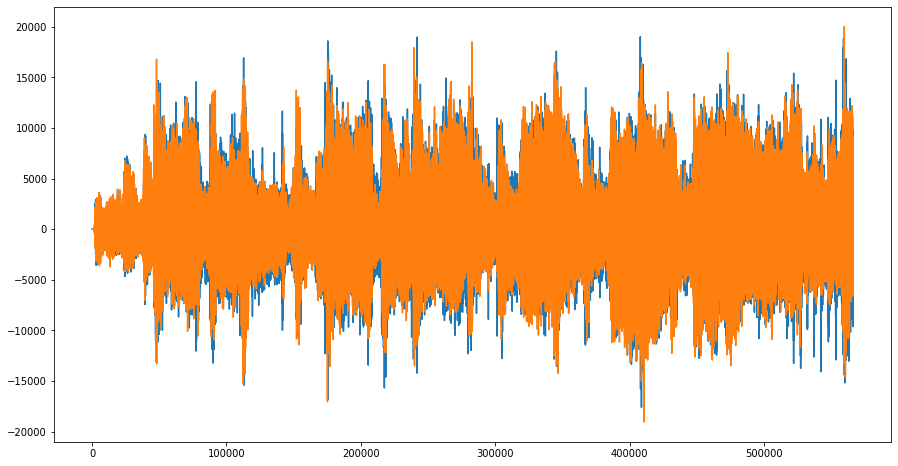

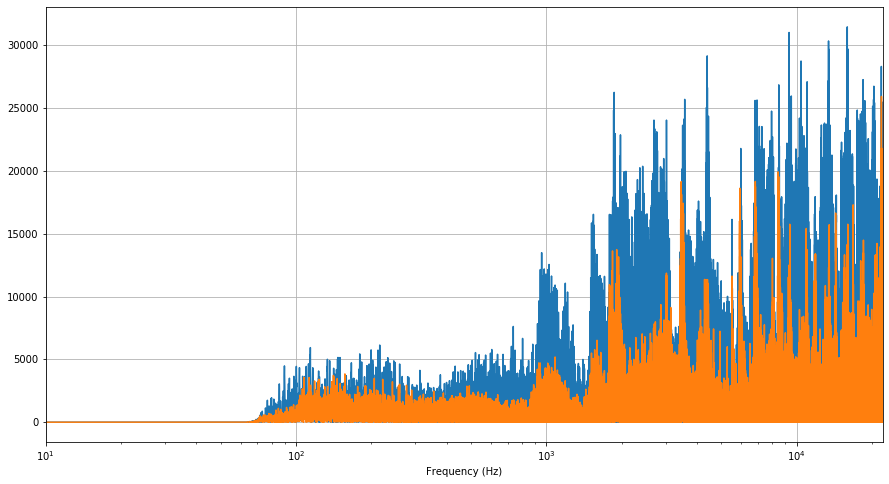

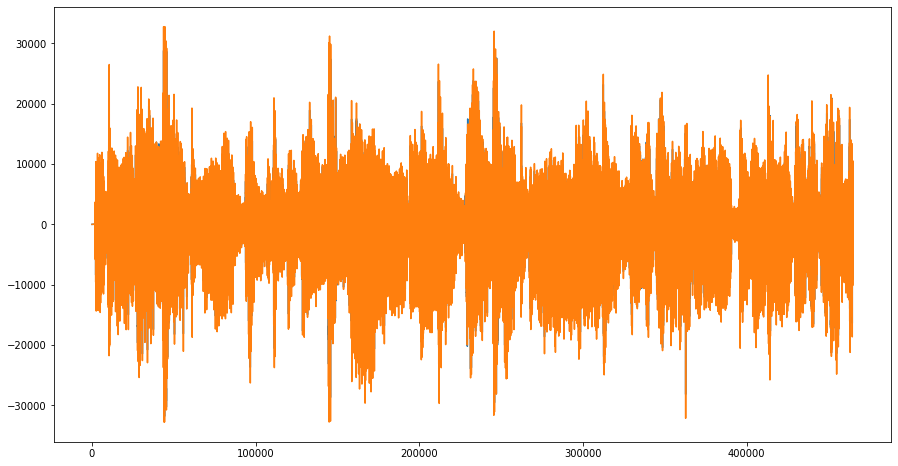

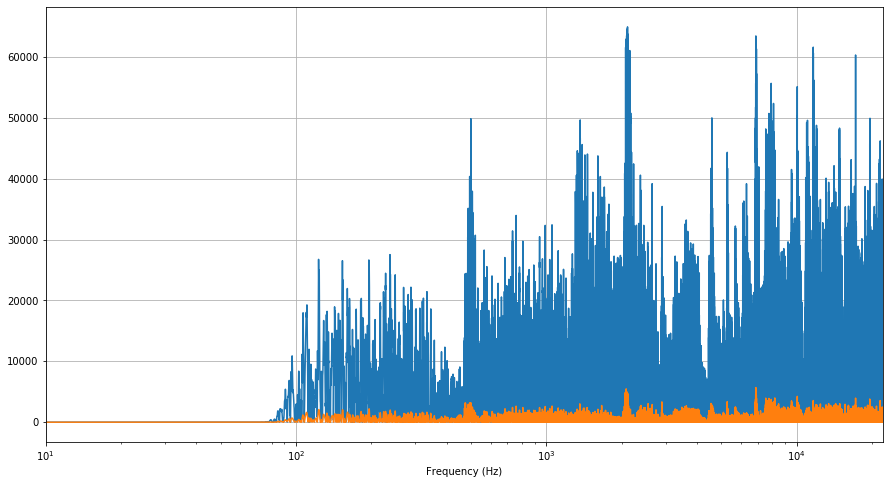

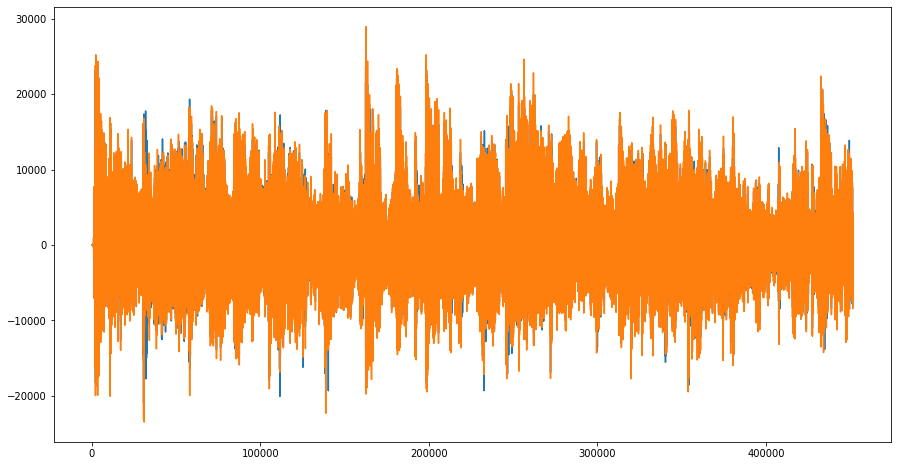

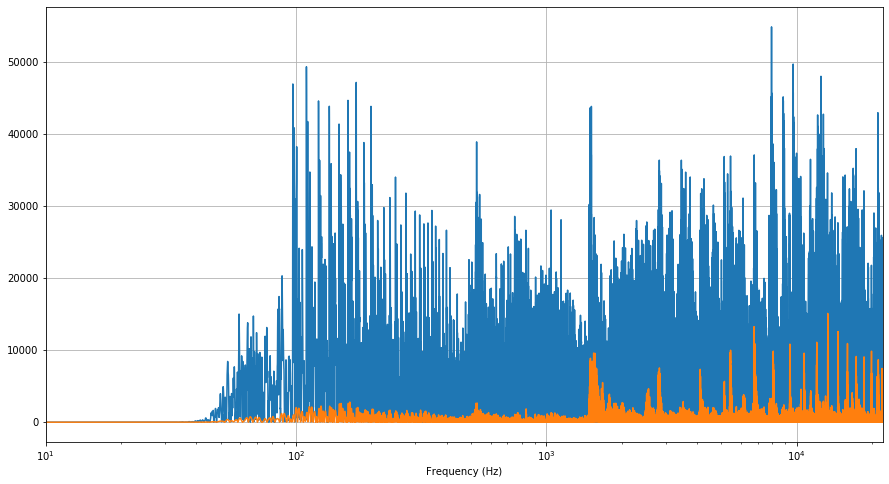

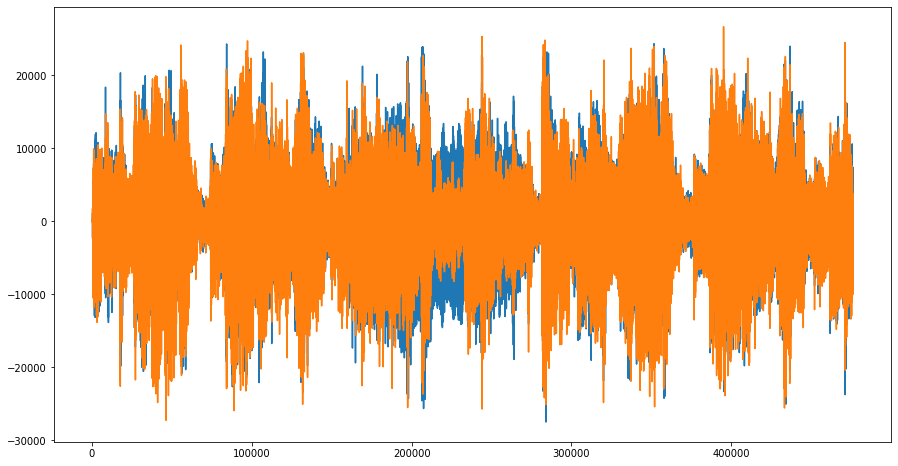

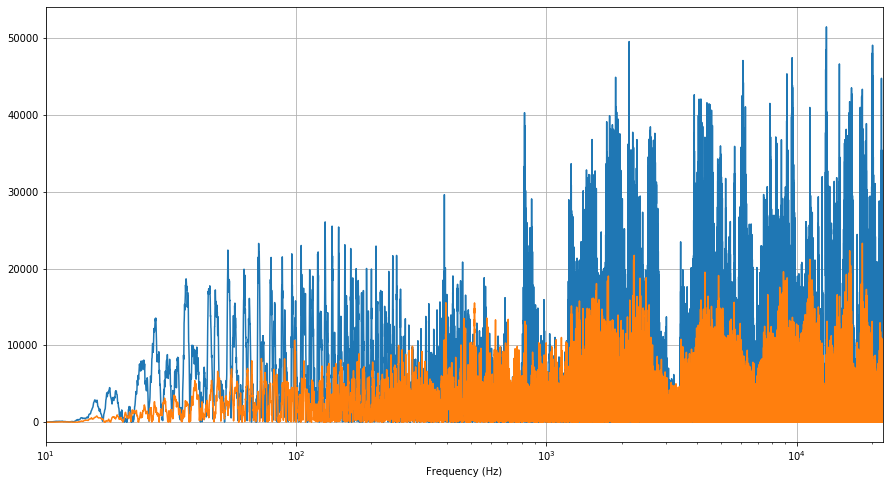

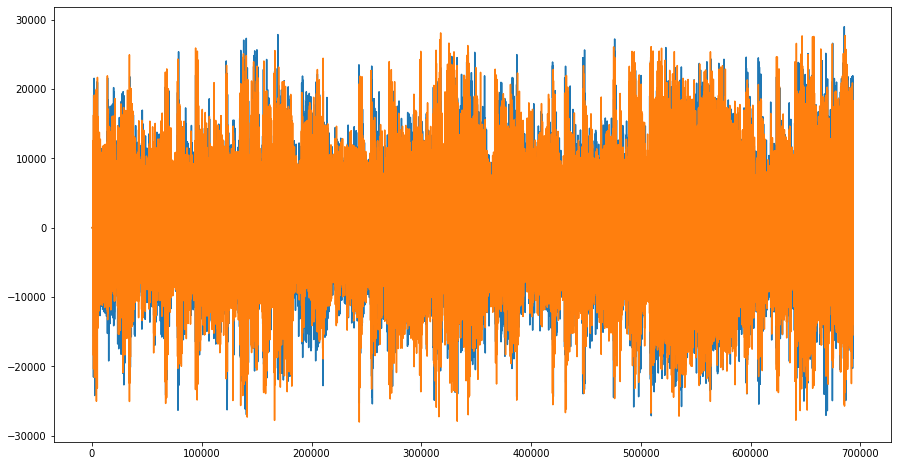

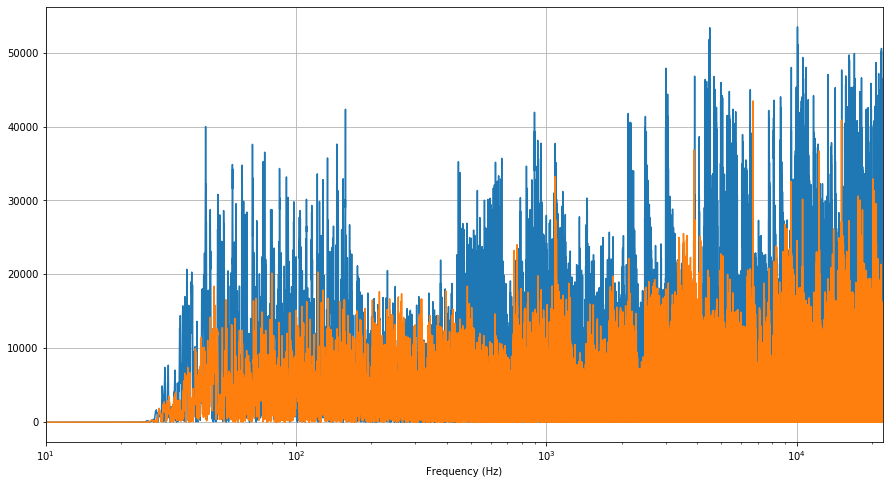

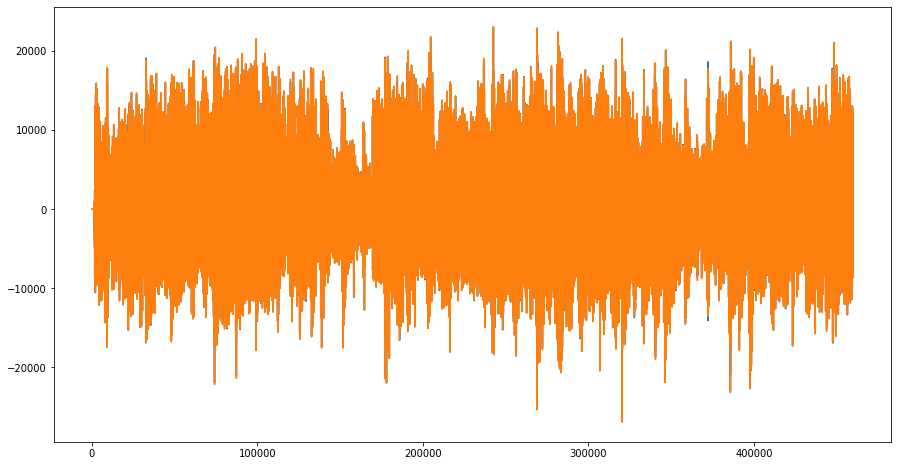

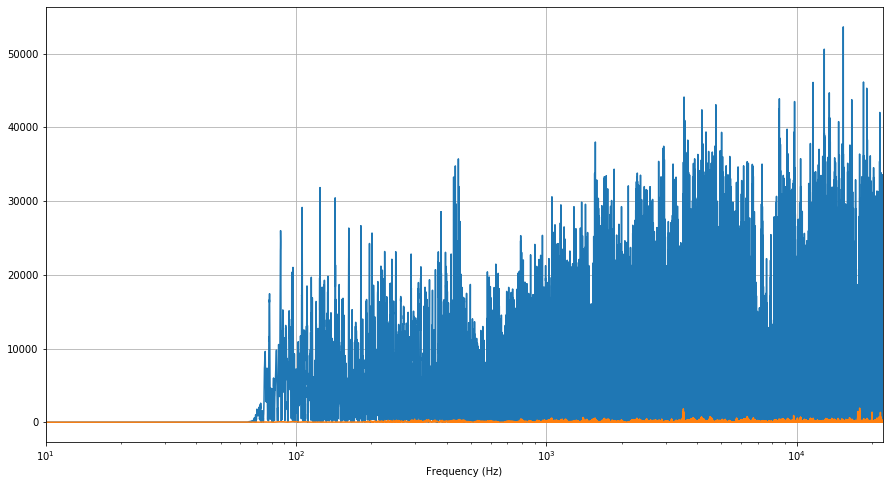

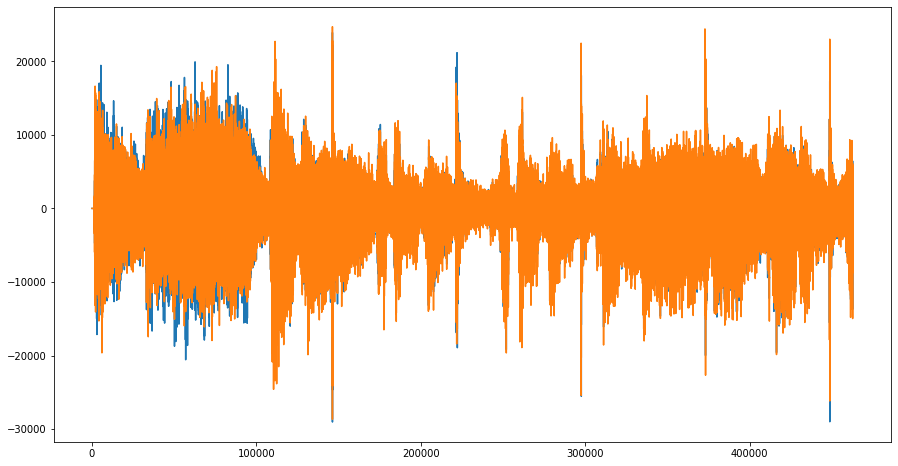

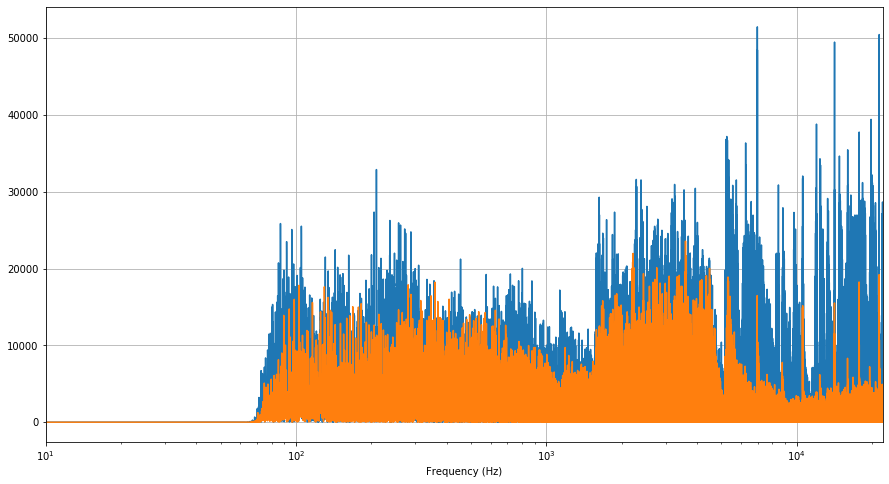

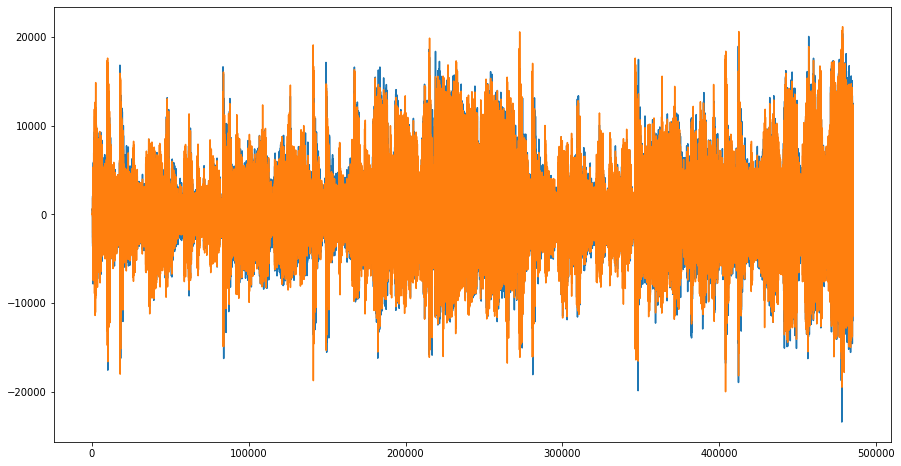

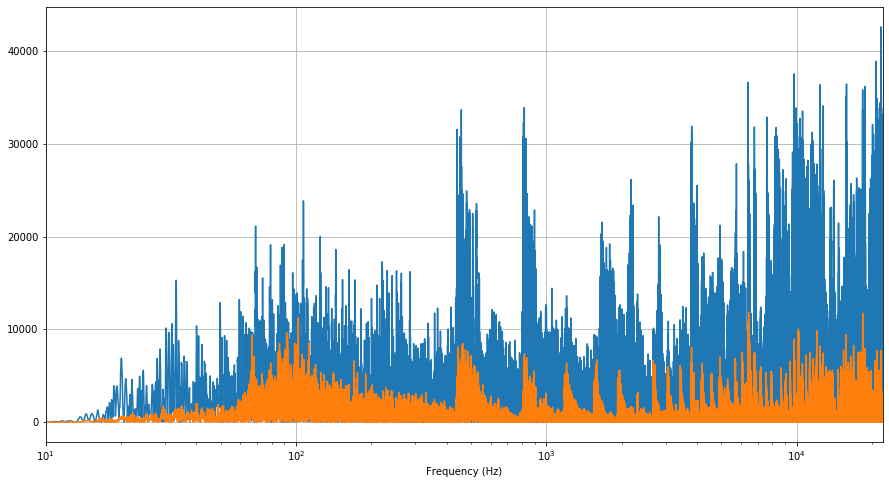

In [7]:
for i in range(len(music)):
    samplerate, data = wav.read(dr+music[i])
    samples = data.shape[0]*data.shape[1]
    freqs = fftfreq(samples,1/samplerate)
    datafft = fft(data)
    fftabs = abs(datafft)
    plt.figure(figsize=(15,8))
    plt.plot(data)
    plt.savefig(dr+music[i][:-4]+"_signal.png")
    plt.figure(figsize=(15,8))
    plt.xlim( [10, samplerate/2] )
    plt.xscale( 'log' )
    plt.grid( True )
    plt.xlabel( 'Frequency (Hz)' )
    plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    plt.savefig(dr+music[i][:-4]+"_freq_log.png")

c:\users\comp\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


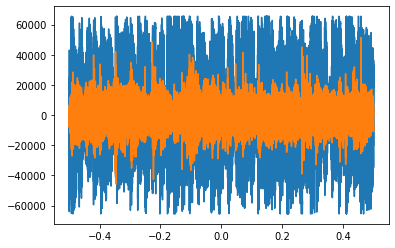

In [18]:
spectrum = np.fft.fft(data0)
frequencies = np.fft.fftfreq(len(spectrum))
pyl.plot(frequencies,spectrum)
pyl.show()